Adding spot for links to resources used:

<sup> 1 </sup>https://www.nerdwallet.com/article/investing/cryptocurrency-7-things-to-know

<sup> 2 </sup>https://coinmarketcap.com/

<sup> 3 </sup>https://www.getsmarter.com/blog/career-advice/what-stakeholders-are-involved-in-the-blockchain-strategy-system/#:~:text=Stakeholders%20from%20the%20networking%20layer,network%20is%20a%20distributed%20one


In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/crypto-markets.csv')

In [19]:
#Set up the data
print(df.columns)
#Describe some of these terms in the final file

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread'],
      dtype='object')


In [20]:
len(df.slug.unique())

2071

In [21]:
#Convert raw data to log scale for easier data manipulation and analysis 
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [22]:
df['log_close'] = np.log(df.close)
df['log_volume'] = np.log(df.volume)
df['log_market'] = np.log(df.market)
df['spread'] = (df.high - df.low) / df.close
df['log_return'] = np.log(df.close / df.close.shift(1))
df.close.head()

0    134.21
1    144.54
2    139.00
3    116.99
4    105.21
Name: close, dtype: float64

In [23]:
#replace all none values
crypto = crypto.replace([np.inf,-np.inf, np.nan], 0)
#crypto.head(10)

2013-04-28 to 2018-11-30


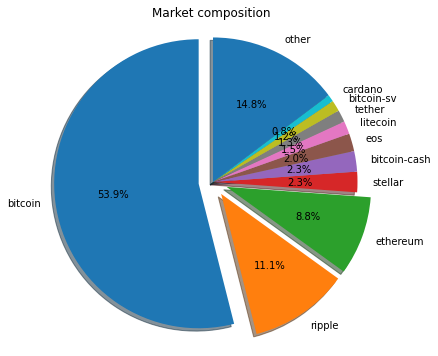

In [28]:
#Trying out code for question 1

#Need to know what dates this data ranges from
crypto['date'] = pd.to_datetime(crypto['date'])
date_range = str(crypto['date'].dt.date.min()) + ' to ' + str(crypto['date'].dt.date.max())
print(date_range)

#Picking a date to create pie chart for representation of this section
crypto_date = crypto[crypto.date == datetime(2018,11,29)]
crypto_date.sort_values('ranknow', ascending = True)
crypto_date['composition'] = np.where(crypto_date.ranknow <= 10, crypto_date.ranknow, 100)
crypto_mkt_comp = crypto_date.groupby(by = ['composition'])['market'].sum()

#Pie chart

labels = crypto_date[crypto_date.ranknow <= 11].slug.replace('monero', 'other')
sizes = crypto_mkt_comp

make_larger = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.set_title('Market composition')
ax1.pie(sizes, explode = make_larger, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()